<h1><center><b>Traffic Sign Board Prediction </b></center></h1>

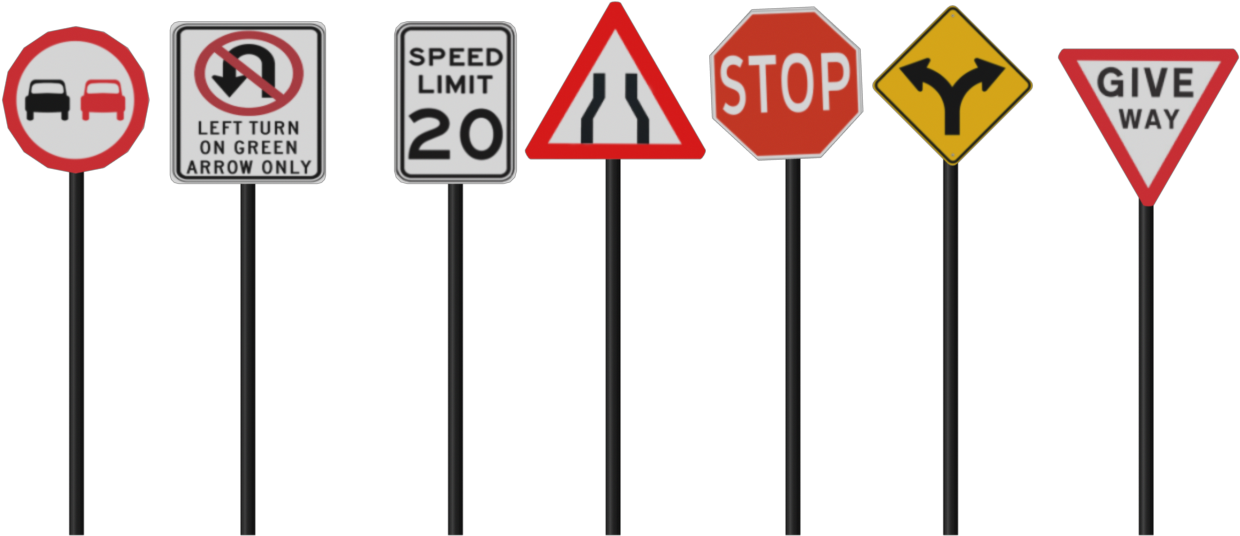

## <u> Prediction from Video:</u>

### We Captured a video where traffic signs are displayed in mobile and this video will be passed to the ffmpeg, where it will be converted to the frames and will pass those images to the model for prediction. After model predicting the images we are displaying those predictions over images.

#### Followed below steps :
1. Imported Libraries
2. Defined a Function
3. Recalling the model.
4. Prediction 

In [1]:
#Importing the Libraries
#Used PIL,glob,imageio instead of OpenCV
from PIL import Image 
import glob
import imageio
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.models import load_model
import numpy as np
from PIL import Image, ImageOps

### Recalled all the class names and labels for predicting and printing the respective label on the image.
### getClassName:
1. By calling this function it will match the respective class number to class names.

In [2]:
#getClassName function will map all the predicted labels to the Class Names.
def getClassName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'No passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'

### Recorded a video of traffic signs and passed that video to ffmpeg and followed below commands:

#### 1. Opened Anaconda Command Prompt and activated tensorflow environment.

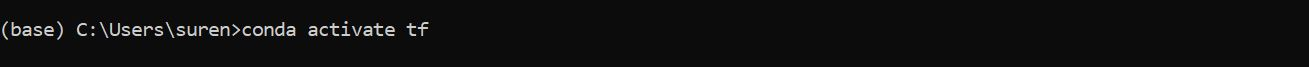

#### 2. Changed the default directory to the video path.

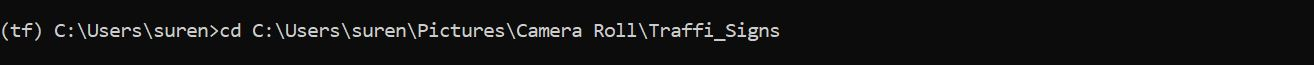

#### 3. Passed video to the ffmeg command, which will convert the video into frames , in this we passed frame rate as 1 sec which will capture one frame per second.

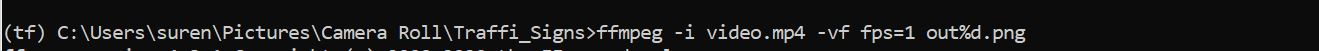

In [3]:
#reloading the model
model = load_model('traffic_sign_board_deteotor.h5')

<ipython-input-6-6ecaec146f2e>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


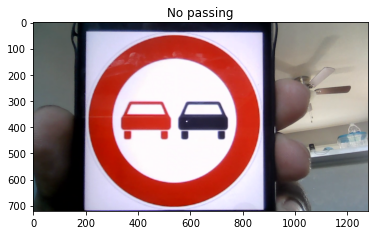

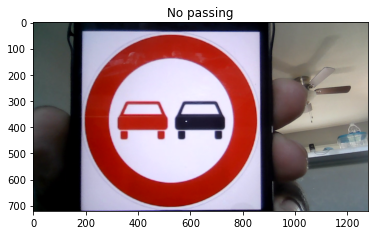

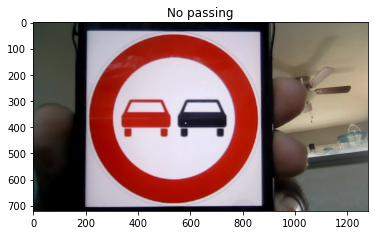

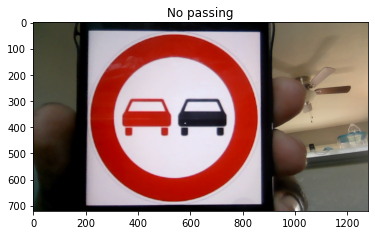

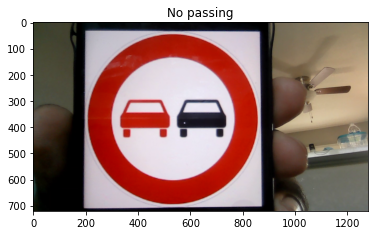

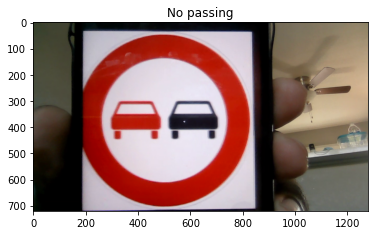

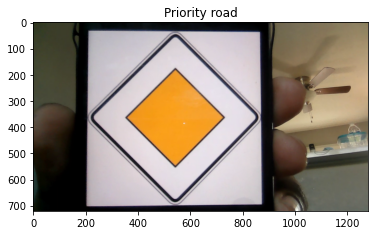

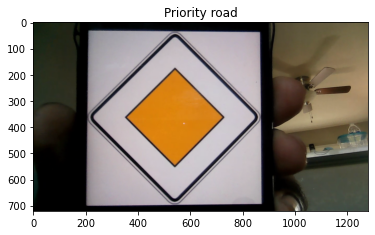

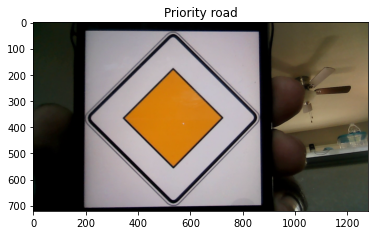

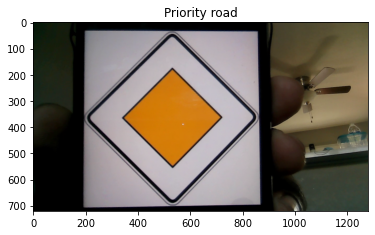

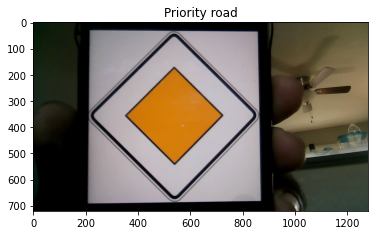

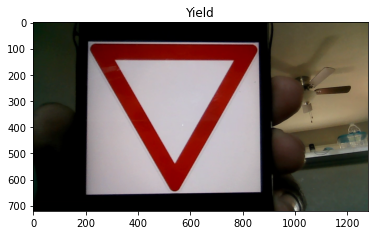

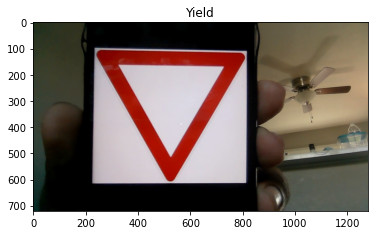

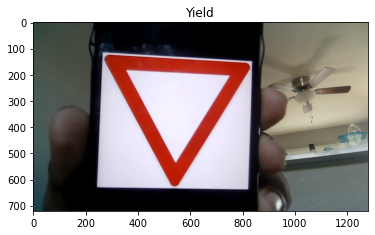

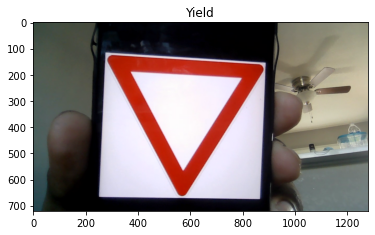

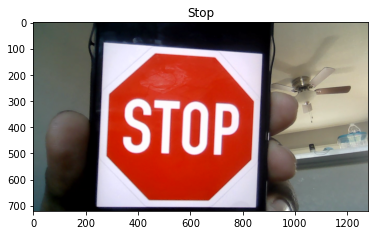

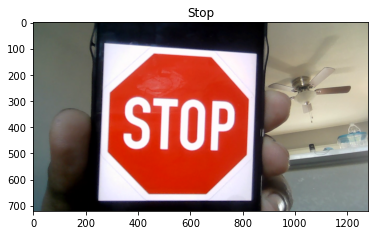

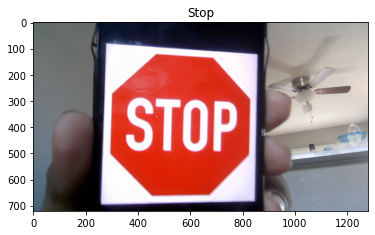

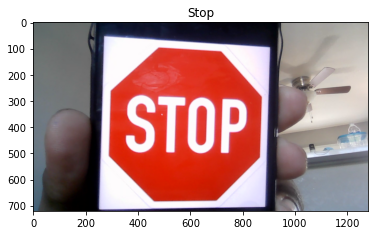

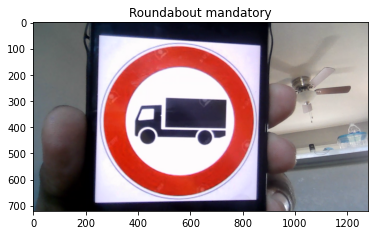

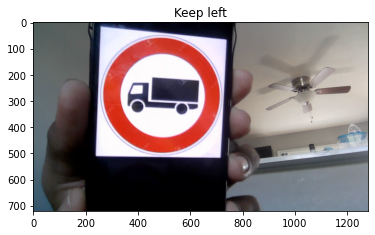

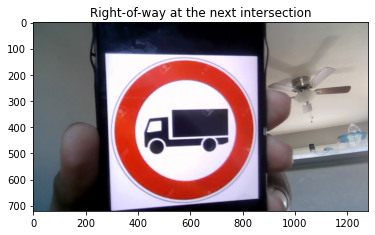

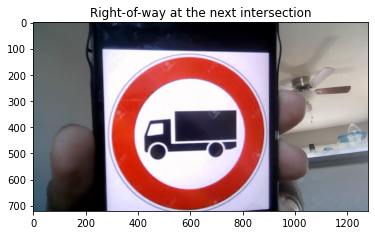

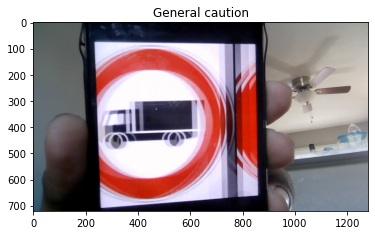

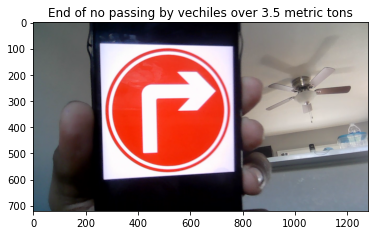

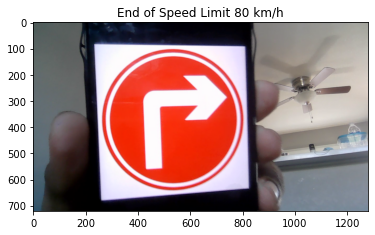

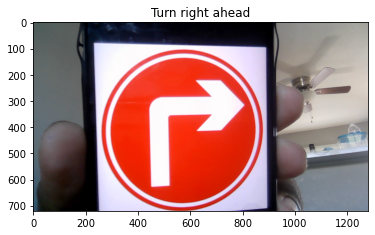

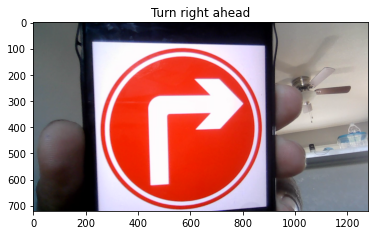

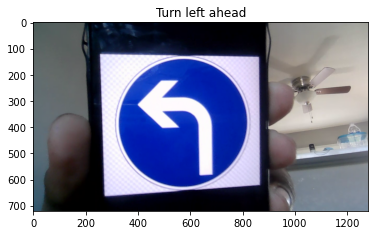

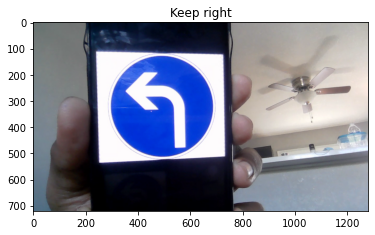

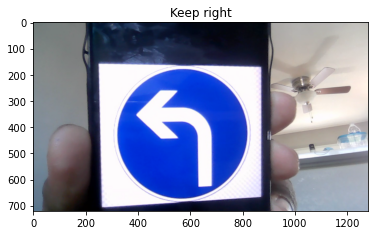

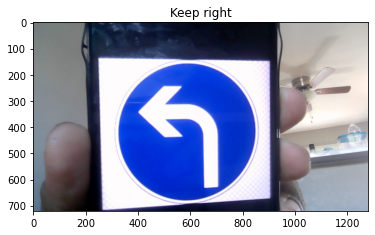

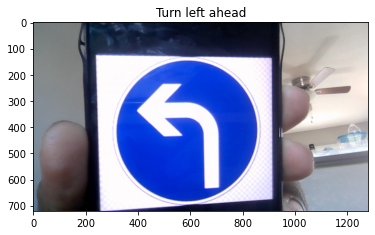

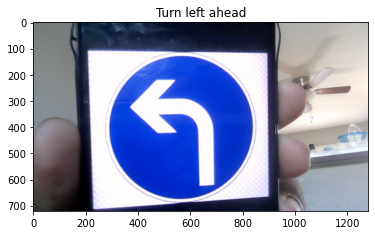

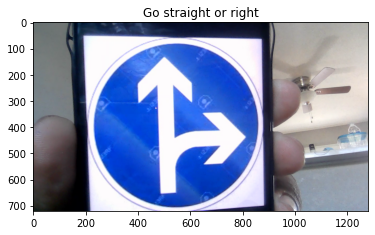

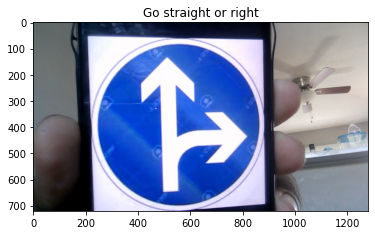

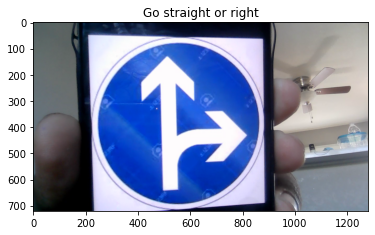

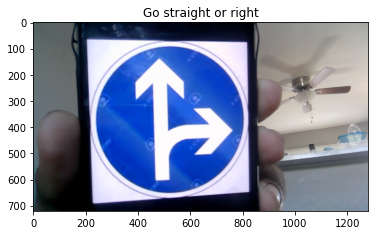

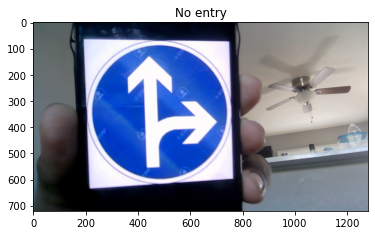

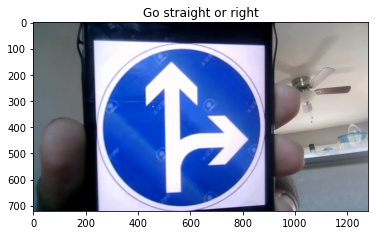

In [6]:
for image_path in glob.glob(r'C:\Users\suren\Pictures\Camera Roll\Traffi_Signs\*.png'):
    imgage1 = Image.open(image_path) #opening the every frame in the given path
    #Image Enhancement
    img = imgage1.resize((32, 32)) #resizing the images inorder to fit for model
    img = ImageOps.grayscale(img) #done grayscaling 
    img = ImageOps.equalize(img, mask = None) #done equalize before passing to model
    im = np.array(img) #converted arrays to image
    im = im/255 #Normalising the values between 0 and 1 instead of 0 and 255
    im = im.reshape(1, 32, 32, 1) #Reshaping the image of 1024 pixel to 32*32 1 dim
    #Image prediction
    predictions = model.predict(im) #Passing the image to the model
    classIndex = model.predict_classes(im) #predicting the Class Index
    #Recalling the pre-defined function
    ClassName = getClassName(classIndex) 
    #Image plotting
    plt.figure() 
    plt.imshow(imgage1)
    plt.title(ClassName) #Title of the image

## <u>Conclusion: </u>
Model predicted the images correctly when it got better view of the traffic sign board.

# By using Open CV, we predicted the image, by passing to the model as done in the above way

In [5]:
import numpy as np
import cv2

In [ ]:
#Camera window details
font = cv2.FONT_HERSHEY_SIMPLEX #Loading a font
cap = cv2.VideoCapture(r'C:\Users\suren\Pictures\Camera Roll\Traffi_Signs\videoo.mp4')
cap.set(3, 640) #resolution 
cap.set(4, 480) #resolution
cap.set(10, 0.75) #threshhold value
frame_threshold = 0.75


def grayscale(frame): #Function for converting the image to grayscale
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    return frame
def equalize(frame): #Function for image equalization
    frame =cv2.equalizeHist(frame)
    return frame
def preprocessing(frame): #Function for preprocessing
    frame = grayscale(frame)
    frame = equalize(frame)
    frame = frame/255
    return frame

while(cap.isOpened()):
    # Image reading from video
    success, frameOrignal = cap.read() #Checking for frames
    frame = np.asarray(frameOrignal) #Converting to numpy
    frame = cv2.resize(frame, (32, 32)) #Resizing 
    frame = preprocessing(frame) #Processing all the predclared functions on the image
    cv2.imshow("Processed Image", frame) 
    frame = frame.reshape(1, 32, 32, 1) #Image reshaping
    #Printing text on the video
    cv2.putText(frameOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA) #printing CLASS text
    cv2.putText(frameOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA) #Printing probability text
    # Model Prediction
    predictions = model.predict(frame) #Passing image to the model.
    classIndex = model.predict_classes(frame) #predicting every frame in the model.
    probabilityValue =np.amax(predictions) #by based on the prediction value 
    if probabilityValue > frame_threshold: #If the threshold is greater than the given threshold
        #Printing CLass and CLass Name predictions
        cv2.putText(frameOrignal,str(classIndex)+" "+str(getClassName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(frameOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", frameOrignal) #Re-displaying the image again.
 
    if cv2.waitKey(1) and 0xFF == ord('q'): #Break 
        break 

# Conclusions:
1. Created texts(Class & Probability) on video
2. Passed every frame to the model and printed the model prediction on that.

### Input video :
[Input Video](https://drive.google.com/file/d/1nhNav9Jxb94P7FvTpcssORKYXSJ6ioXz/view?usp=sharing)

### Output Video :
[FInal Video](https://drive.google.com/file/d/18OC1aweRrJ7kha6eYTE4WErzCjAF1TkP/view?usp=sharing)